## PRACTICAL 4: ASSOCIATION RULE MINING ##

## 1. APRIORI ALGORITHM ##

In [ ]:
import numpy as np # linear algebra
import pandas as pd

**A. Explore the dataset**

In [ ]:
#import bike_sales dataset
data = pd.read_excel("Bike_Sales.xlsx")
#View dataset as pandas dataframe
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2021-12-31,31,December,2021,52,Adults (35-64),F,United Kingdom,England,Bikes,Road Bikes,"Road-250 Black, 58",2,1555,2443,1776,3110,4886
113032,2021-12-31,31,December,2021,25,Young Adults (25-34),F,Germany,Hessen,Bikes,Road Bikes,"Road-550-W Yellow, 38",1,713,1120,407,713,1120
113033,2021-12-31,31,December,2021,26,Young Adults (25-34),M,Australia,Queensland,Bikes,Road Bikes,"Road-550-W Yellow, 42",1,713,1120,407,713,1120
113034,2021-12-31,31,December,2021,33,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1,1252,2295,1043,1252,2295


In [ ]:
data.shape

(113036, 18)

The dataset has 113036 rows of the purchase orders of people from different countries. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm. We are specifically interested in the products purchased and how to use that to inform and maximise sales on each day

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Products Sold')]

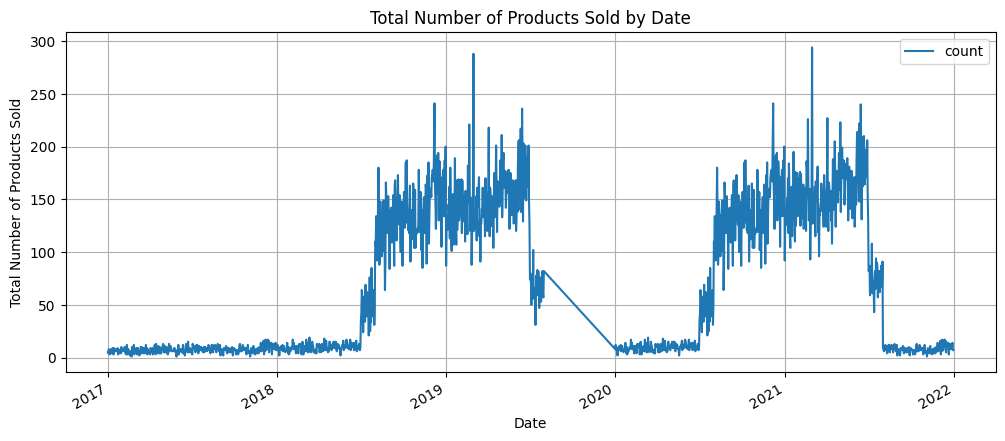

In [ ]:
data.groupby(['Date'])['Product'].agg(['count']).plot(figsize=(12,5),
grid=True, title="Total Number of Products Sold by Date").set(xlabel="Date", ylabel="Total Number of Products Sold")

In [ ]:
#Let's subset the dataframe to only respond to the question at hand
data2=data[["Date", "Product"]]
#View the subsetted dataframe
data2.head()

,Date,Product
0,2017-01-01,"Road-250 Red, 44"
1,2017-01-01,"Mountain-200 Black, 46"
2,2017-01-01,"Road-150 Red, 48"
3,2017-01-01,"Road-550-W Yellow, 38"
4,2017-01-01,"Road-750 Black, 44"


In [ ]:
#Number of products sold on each date
data2['Product'].value_counts()

Product
Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: count, Length: 130, dtype: int64

In [ ]:
#Let's view the  Product count as a visual
import plotly.express as px

#Generate a function for the plot
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(),
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)

    fig.show()

#Use the above function to plot the product count
bar_plot(data2,'Product')

**B. Tansform the products for the apriori analysis**

For instance, if supermarket sells four products — A, B, C, and D. This would mean that there can be 11 ways one can buy a combination of these products. These are the transactions:

A, B

A, C

A, D

B, C

B,D

C, D

A, B, C

B, C, D

A, C, D

A,B,D

A,B,C,D

In [ ]:
transactions = [a[1]['Product'].tolist() for a in list(data2.groupby(['Date']))]

In [ ]:
#View the transactions or product groupings
transactions

[['Road-250 Red, 44',
  'Mountain-200 Black, 46',
  'Road-150 Red, 48',
  'Road-550-W Yellow, 38',
  'Road-750 Black, 44'],
 ['Road-550-W Yellow, 38',
  'Road-550-W Yellow, 48',
  'Road-550-W Yellow, 40',
  'Road-250 Red, 58'],
 ['Mountain-200 Black, 38',
  'Mountain-200 Silver, 42',
  'Mountain-200 Silver, 42',
  'Road-150 Red, 48',
  'Road-750 Black, 48',
  'Road-750 Black, 48',
  'Road-750 Black, 44',
  'Road-550-W Yellow, 44'],
 ['Mountain-200 Black, 38',
  'Road-150 Red, 52',
  'Road-650 Red, 62',
  'Road-150 Red, 44',
  'Road-550-W Yellow, 38'],
 ['Road-350-W Yellow, 48', 'Road-650 Red, 48', 'Road-650 Black, 60'],
 ['Road-150 Red, 62',
  'Mountain-500 Black, 44',
  'Road-750 Black, 48',
  'Road-550-W Yellow, 48',
  'Road-150 Red, 62',
  'Road-750 Black, 48'],
 ['Road-750 Black, 52',
  'Road-350-W Yellow, 42',
  'Road-350-W Yellow, 40',
  'Road-550-W Yellow, 40'],
 ['Mountain-200 Black, 46',
  'Road-150 Red, 62',
  'Mountain-200 Black, 42',
  'Road-350-W Yellow, 48',
  'Road-550-W

In [ ]:
#Import libraries to transform the transaction groupings
#TransactionEncoder converts item lists into transaction data for frequent itemset mining
!pip install mlxtend
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


for details about TransactionEncoder-http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [ ]:
te = TransactionEncoder()

In [ ]:
te_ary = te.fit(transactions).transform(transactions)

In [ ]:
te.columns_

['AWC Logo Cap',
 'All-Purpose Bike Stand',
 'Bike Wash - Dissolver',
 'Classic Vest, L',
 'Classic Vest, M',
 'Classic Vest, S',
 'Fender Set - Mountain',
 'HL Mountain Tire',
 'HL Road Tire',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Hitch Rack - 4-Bike',
 'Hydration Pack - 70 oz.',
 'LL Mountain Tire',
 'LL Road Tire',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, S',
 'Long-Sleeve Logo Jersey, XL',
 'ML Mountain Tire',
 'ML Road Tire',
 'Mountain Bottle Cage',
 'Mountain Tire Tube',
 'Mountain-100 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-100 Black, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 42',
 'Mountain-100 Silver, 44',
 'Mountain-100 Silver, 48',
 'Mountain-200 Black, 38',
 'Mountain-200 Black, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 38',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-400-W Silver, 38',
 'Mountain-4

In [ ]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
#Call the newly transformed dataframe "pf"
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()


In [ ]:
#View the  transformed products and the counts, and frequent items
pf

,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
count,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,...,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,890,1324,980,1414,1416,1418,898,1104,1278,1154,...,1582,1554,1564,1566,1594,1600,884,1302,1238,1248


In [ ]:
pf.iloc[0]-pf.iloc[3]

AWC Logo Cap                  782
All-Purpose Bike Stand        348
Bike Wash - Dissolver         692
Classic Vest, L               258
Classic Vest, M               256
                             ... 
Touring-3000 Yellow, 62        72
Water Bottle - 30 oz.         788
Women's Mountain Shorts, L    370
Women's Mountain Shorts, M    434
Women's Mountain Shorts, S    424
Length: 130, dtype: object

In [ ]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1668,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1669,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
item

,Count,Item
126,788,Water Bottle - 30 oz.
0,782,AWC Logo Cap
32,781,"Mountain-200 Black, 38"
99,778,"Sport-100 Helmet, Black"
52,776,Patch Kit/8 Patches
6,774,Fender Set - Mountain
101,770,"Sport-100 Helmet, Red"
100,764,"Sport-100 Helmet, Blue"
23,760,Mountain Tire Tube
35,737,"Mountain-200 Silver, 38"


**C. Generate a wordcloud of the count of the products**

Text-mining

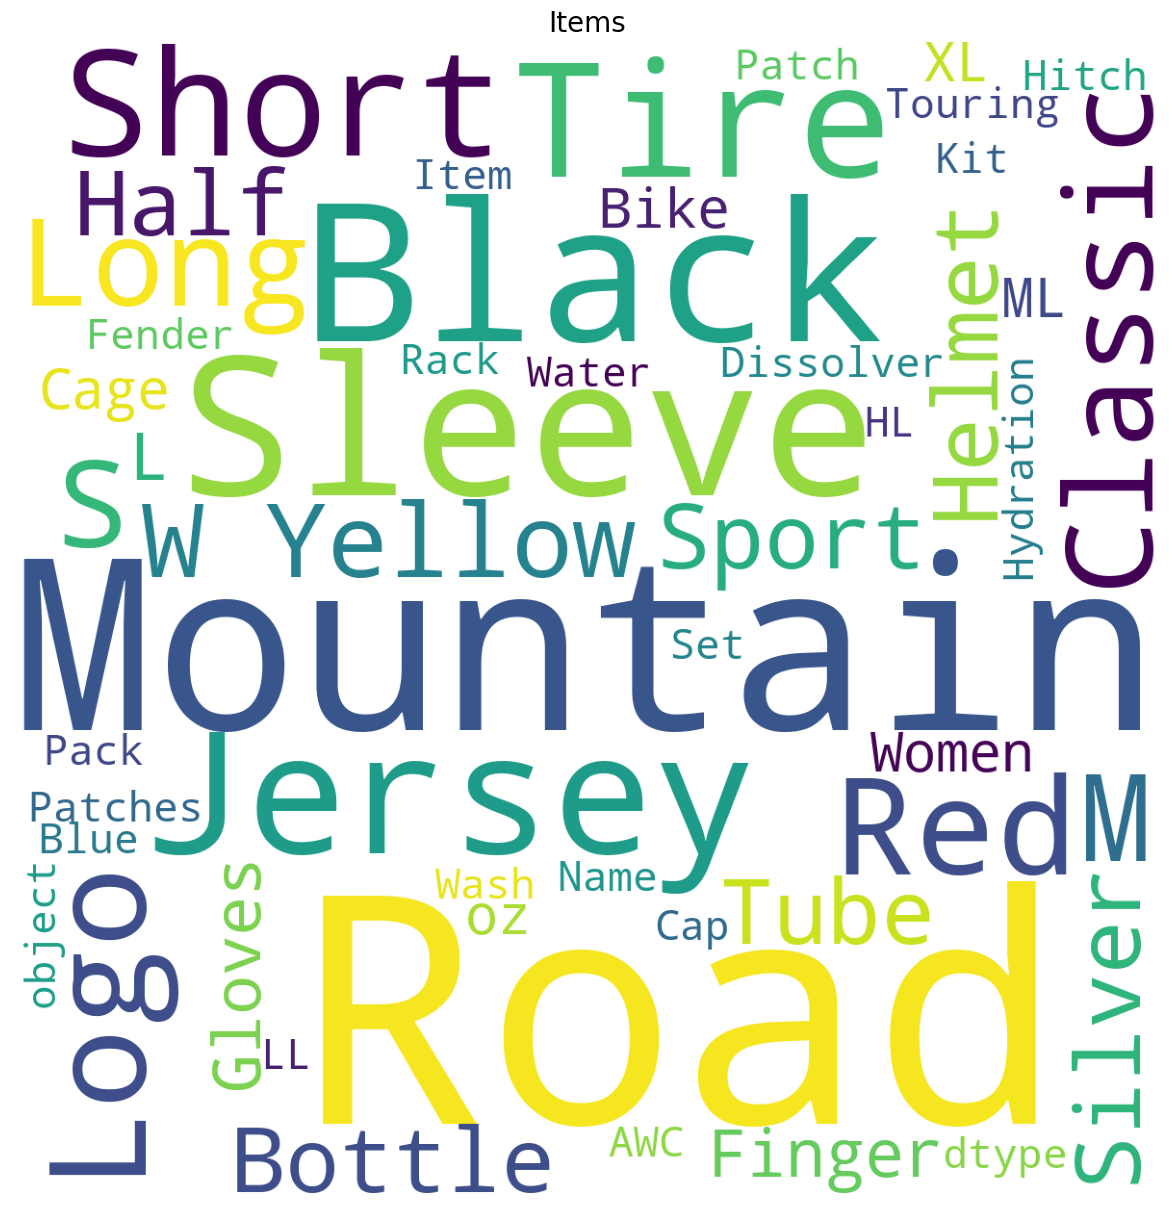

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [ ]:
#Or a tree map of the products
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

**D. Run the apriori analysis of association**

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

Support: The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

Support(I)=Number of transactions containing I/Total number of Transactions

Confidence: This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)

Lift: Lift is the ratio between the confidence and support expressed as :

Lift(I1->I2)=Confidence(I1->I2)/Support(I2)

In [ ]:
#Import the apriori libraries and the association rules
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
#Look for the frequently purchased products
#We are using a minimum support value of 1% or 0.001
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 41548584 combinations | Sampling itemset size 4

: 

Notice that because this is a big dataset, apriori algorithm struggles to process it and the kernel might crash. Thus apriori is suited to smaller datasets

**E. Using a suitable dataset**

In [ ]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
#Import the smaller "Groceries_dataset.csv"
data3=pd.read_csv("Groceries_dataset.csv")
data3

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df=data3.groupby(['Member_number','Date'])['itemDescription'].apply(sum)

/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_6011/2631752203.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  df=data3.groupby(['Member_number','Date'])['itemDescription'].apply(sum)


In [ ]:
transactions2 = [a[1]['itemDescription'].tolist() for a in list(data3.groupby(['Member_number','Date']))]

In [ ]:
transactions2

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [ ]:
te = TransactionEncoder()

In [ ]:
te_ary = te.fit(transactions2).transform(transactions2)

In [ ]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [ ]:
transactions2 = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions2.describe()

In [ ]:
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [ ]:
pf.iloc[0]-pf.iloc[3]

Instant food products      60
UHT-milk                  320
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               359
white wine                175
whole milk               2363
yogurt                   1285
zwieback                   60
Length: 167, dtype: object

In [ ]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions2

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


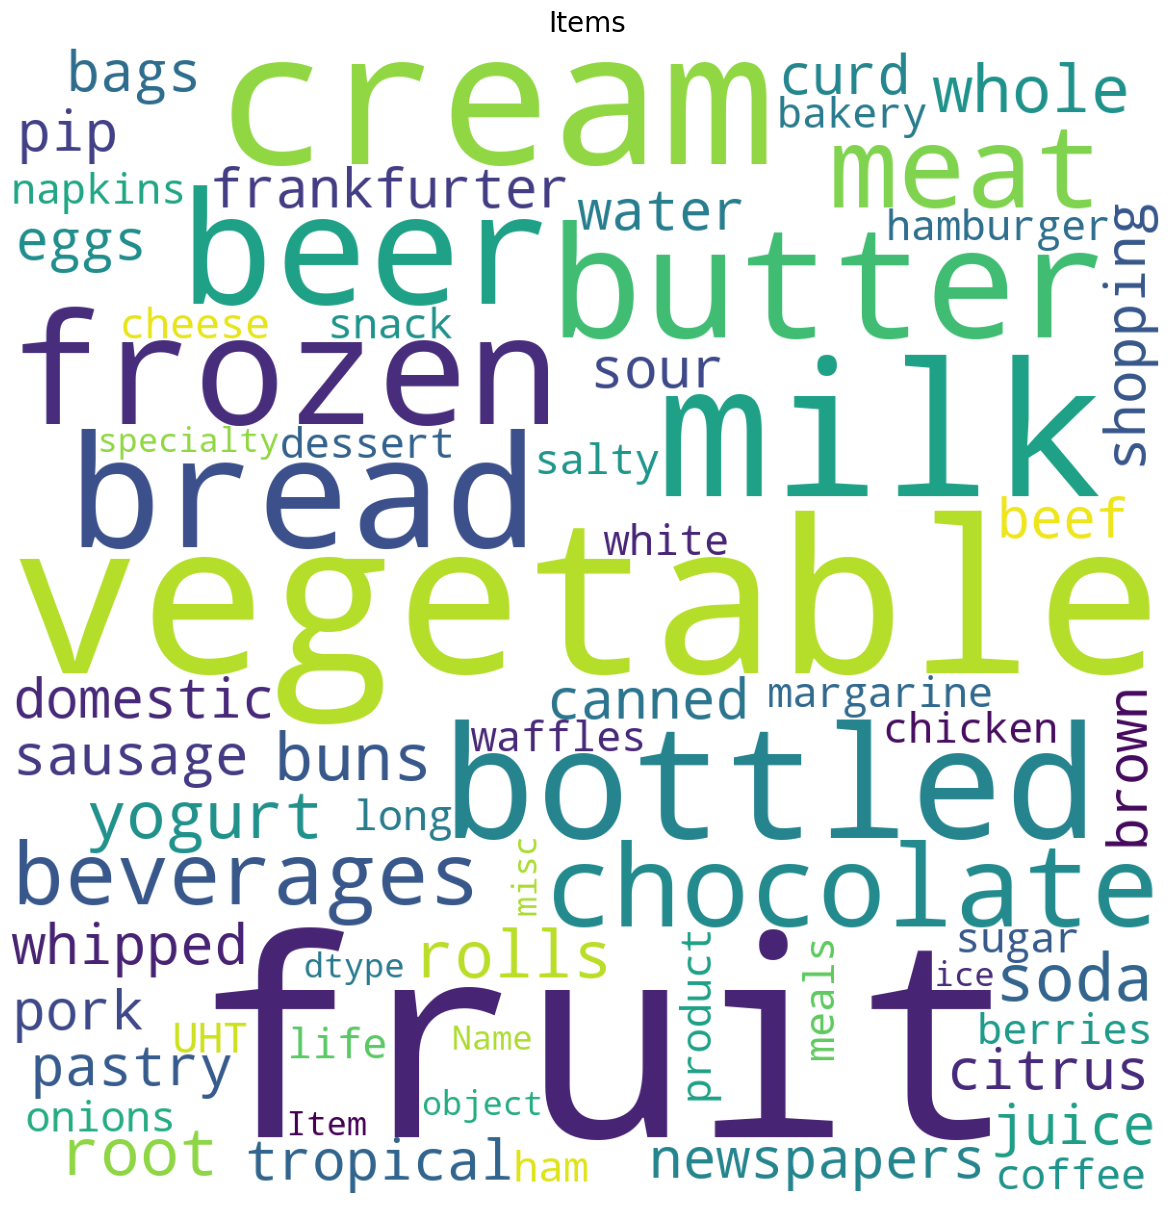

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [ ]:
import plotly.express as px
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
freq_items = apriori(transactions2, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [ ]:
#Calculate the rules association parameters
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009,-0.236873


<a id="2"></a> <br>
## How to interprete the above data
* antecedents and consequents -> The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.
* antecedent support -> This measure gives an idea of how frequent antecedent is in all the transactions. Like (bottled water) is present in 6.06% of the transactions..
* consequent support -> This measure gives an idea of how frequent consequent is in all the transactions. Like (UHT-milk) is present in 2.13% of the transactions.
* support -> This measure gives an idea of how frequent ItemSet is in all the transactions. Like {bottled water,UHT-milk} is present in 0.1% of the transactions.
* confidance -> This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents. So {UHT-milk} > {bottled water} as a confidence of 1.76%%. In simple words their is an 1.76% chance of finding {bottled water} , if the cart contains {UHT-milk}.
* lift -> Ratio between confidence and support. This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedent, but controlling the popularity of consequent. So lift of {bottled water} w.r.t {UHT-milk} is 0.82.
A lift value greater than 1 means that item Y is likely to be bought if item X is bought (i.e. UHT-milk is likely to be bought if bottled water is bought), while a value less than 1 means that item Y is unlikely to be bought if item X is bought.
* Any lift value < 1 implies that the Association rule is NOT worth considering. Therefore, there's no association between the purchase of UHT-milk and bottled water.


**F. Plot the association parameters**

In [ ]:
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",

    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')

)

fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

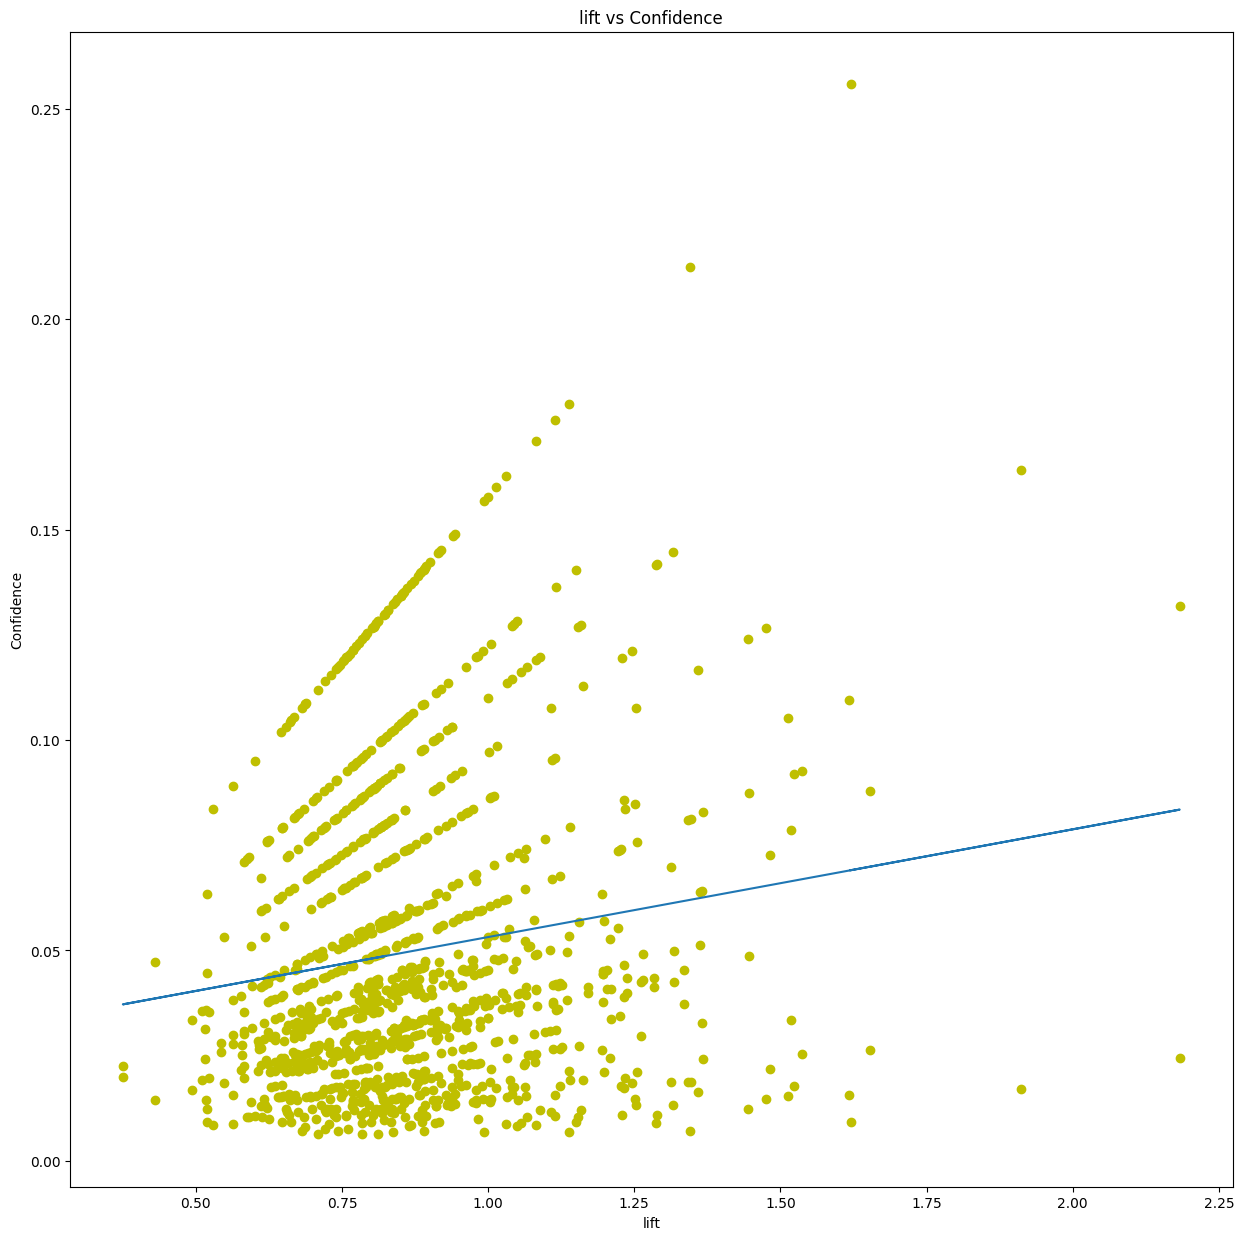

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

## 2. FP-Growth ALGORITHM ##

* Looks for frequent itemset patterns like apriori but taking a shorter time to process
* FP Growth is one of the associative rule learning techniques which is used in machine learning for finding frequently occurring patterns.
* We are using the bike_sales dataset which was imported as a pandas dataframe "data"

In [ ]:
#Importing Libraries
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth


**A. Transform the dataset**
* Our dataframe is in a structure where the Date is different for each product purchased.
* It's necessary to create a new list with grouping by Date and product
* We apply the function “TransactionEncoder” because it is not possible to fit the FP Growth algorithm directly on a list of transactions. You first have to encode it, with an encoder comparable to a One-Hot Encoder.

In [ ]:
transactions = [a[1]['Product'].tolist() for a in list(data.groupby(['Date']))]
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

#Call the newly transformed dataframe "pf"
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()

#View the transactions
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1668,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1669,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Generate a tree map of the transactions
import plotly.express as px
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

**B. Use the minimum support to filter out non-frequent item**
* Decide the minimum support of items to pass in the FP Growth function.
* This decision is based on the knowledge of the business and databases from the business. For example, the dataset that I used has a lot of products then the frequency of them will be more dispersed, for this reason, I use the minimum support as 0.01.

In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
# List of frequency top 10 itemset
frequent_itemsets = fpgrowth(transactions, min_support=0.01, use_colnames = True)
frequent_itemsets.head (10)

KeyboardInterrupt: 

**C. Compute the association rules and their parameters**

* Apply the FP Algorithm in our dataframe "frequent_itemsets" and to do this correctly, the function asks us for some parameters like dataframe, metric, and threshold.
* The threshold frequency is defined as the minimum frequency of incidents. We  are using 0.5

In [ ]:
# compute and print the association rules
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)